In [1]:
import sys; print('Python \t\t{0[0]}.{0[1]}'.format(sys.version_info))
import tensorflow as tf; print('Tensorflow \t{}'.format(tf.__version__))
import keras; print('Keras \t\t{}'.format(keras.__version__))

Python 		3.6
Tensorflow 	1.0.0


Using TensorFlow backend.


Keras 		2.0.3


In [2]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../mnist-data/", one_hot=True)

Extracting ../mnist-data/train-images-idx3-ubyte.gz
Extracting ../mnist-data/train-labels-idx1-ubyte.gz
Extracting ../mnist-data/t10k-images-idx3-ubyte.gz
Extracting ../mnist-data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images.shape

(55000, 784)

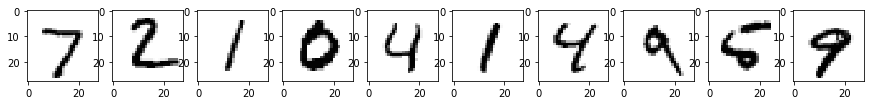

In [5]:
plt.figure(figsize=(15,5))
for i in list(range(10)):
    plt.subplot(1, 10, i+1)
    pixels = mnist.test.images[i]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
plt.show()

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D


In [7]:
model = Sequential()
model.add(Reshape((28,28,1), input_shape=(784,)))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2))) 

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

In [11]:
32*3*3*64

18432

In [8]:
from  functools import reduce

for l in model.layers:
    print(l.name, l.output_shape, [reduce(lambda x, y: x*y, w.shape) for w in l.get_weights()])

reshape_1 (None, 28, 28, 1) []
conv2d_1 (None, 28, 28, 32) [288, 32]
conv2d_2 (None, 28, 28, 32) [9216, 32]
max_pooling2d_1 (None, 14, 14, 32) []
conv2d_3 (None, 14, 14, 64) [18432, 64]
conv2d_4 (None, 14, 14, 64) [36864, 64]
max_pooling2d_2 (None, 7, 7, 64) []
flatten_1 (None, 3136) []
dropout_1 (None, 3136) []
dense_1 (None, 256) [802816, 256]
dropout_2 (None, 256) []
dense_2 (None, 10) [2560, 10]


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [13]:
from keras.callbacks import TensorBoard, BaseLogger

tb = TensorBoard(log_dir='./tensorboard/keras', histogram_freq=0, write_graph=True, write_images=False)
bl = BaseLogger()

model.fit(mnist.train.images, mnist.train.labels,
          batch_size=250, epochs=5, verbose=1, callbacks=[tb,bl],
          validation_data=(mnist.test.images, mnist.test.labels))

Train on 55000 samples, validate on 10000 samples
Epoch 1/5
55000/55000 [==============================] - 200s - loss: 0.2615 - acc: 0.9163 - val_loss: 0.0502 - val_acc: 0.9837
Epoch 2/5
55000/55000 [==============================] - 196s - loss: 0.0750 - acc: 0.9769 - val_loss: 0.0323 - val_acc: 0.9889
Epoch 3/5
55000/55000 [==============================] - 189s - loss: 0.0512 - acc: 0.9843 - val_loss: 0.0240 - val_acc: 0.9917
Epoch 4/5
55000/55000 [==============================] - 189s - loss: 0.0423 - acc: 0.9872 - val_loss: 0.0208 - val_acc: 0.9924
Epoch 5/5
55000/55000 [==============================] - 190s - loss: 0.0340 - acc: 0.9885 - val_loss: 0.0257 - val_acc: 0.9911


In [14]:
score = model.evaluate(mnist.test.images, mnist.test.labels,verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0256542290048
Test accuracy: 0.9911


In [15]:
# test item #100 is a six
pixels = mnist.test.images[100]
result = model.predict(np.array([pixels]))
dict(zip(range(10), result[0]))

{0: 2.6677342e-06,
 1: 6.8658895e-10,
 2: 3.9473185e-09,
 3: 7.6411266e-10,
 4: 2.3078299e-07,
 5: 5.4647614e-07,
 6: 0.99999607,
 7: 1.2507323e-09,
 8: 5.2479925e-07,
 9: 2.823896e-09}

In [16]:
def test_render(pixels, result, truth):
    #pixels, result and truth are np vectors
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')

    plt.subplot(1, 2, 2)
    
    #index, witdh
    ind = np.arange(len(result))
    width = 0.4

    plt.barh(ind,result, width, color='gray')
    plt.barh(ind+width,truth,width, color='green')
    plt.yticks(ind+width, range(10))
    plt.margins(y=0)

    plt.show()

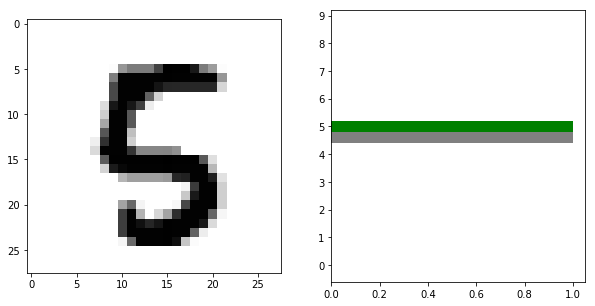

In [17]:
import random
i = random.randint(0,mnist.test.images.shape[0])

pixels = mnist.test.images[i]
truth  = mnist.test.labels[i]
result = model.predict_on_batch(np.array([pixels]))[0]
test_render(pixels, result, truth)

In [18]:
### What went wrong?
pixels = mnist.test.images
result = model.predict_on_batch([pixels])
truth = mnist.test.labels

In [19]:
acc = result.argmax(axis=1) == truth.argmax(axis=1)
incorrect = np.argwhere(acc==False).flatten()

print("Incorrect predictions: {}".format(len(incorrect)))

Incorrect predictions: 89


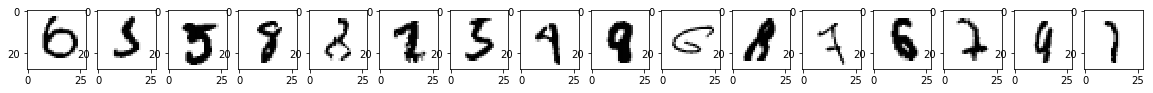

In [20]:
plt.figure(figsize=(20,5))
plt_idx = 1
for i in list(incorrect[:16]):
    plt.subplot(1, 16, plt_idx)
    pixels = mnist.test.images[i]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
    plt_idx += 1
plt.show()


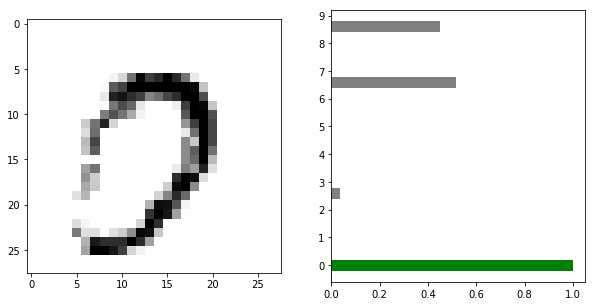

In [21]:
i = random.choice(list(incorrect))

pixels = mnist.test.images[i]
truth  = mnist.test.labels[i]
result = model.predict_on_batch(np.array([pixels]))[0]

test_render(pixels, result, truth)